# Regression Python [Herly]

## Read Data

In [1]:
import pandas as pd

df = pd.read_csv('boston.csv')
df.sample(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,390.30,3.16,43.5
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28,19.6
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
303,0.10000,34.0,6.09,0,0.433,6.982,17.7,5.4917,7,329,16.1,390.43,4.86,33.1
483,2.81838,0.0,18.10,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
69,0.12816,12.5,6.07,0,0.409,5.885,33.0,6.4980,4,345,18.9,396.90,8.79,20.9
62,0.11027,25.0,5.13,0,0.453,6.456,67.8,7.2255,8,284,19.7,396.90,6.73,22.2
251,0.21409,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330,19.1,377.07,3.59,24.8


Data tersebut tentang prediksi harga rumah (medv) di kota Boston, fitur:
1. Criminal rate (crim)
2. Residential land zoned proportion (zn)
3. Non-retail business acres proportion (indus)
4. Is bounds with river (chas)
5. Nitrogen oxides concentration (nox)
6. Number rooms average (rm)
7. Owner age proportion (age)
8. Weighted distance to cities (dis)
9. Accessibility index (rad)
10. Tax rate (tax)
11. Pupil-teacher ratio (ptratio)
12. Black proportion (black)
13. Percent lower status (lstat)


## Split Data

In [2]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

X = df.drop(columns='medv')
y = df[['medv']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature,
                                                                                                  target,
                                                                                                  test_size=0.20,
                                                                                                  random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.20,
                                                  random_state=42)

feature_df_train.shape, feature_df_test.shape

((404, 13), (102, 13))

## Preprocessing Data

In [3]:
# menggabungkan data feature dan target untuk kebutuhan preprocessing data
data_train = pd.concat([feature_df_train, target_df_train], axis=1)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


### Handling Duplicated

In [5]:
data_train.duplicated().sum()

0

Dataset ini tidak memiliki Duplicated Row

### Handling Missing Value

In [6]:
data_train.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Berdasarkan informasi di atas, semua kolom tidak memiliki missing value.

### Handling Outlier

In [7]:
data_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


=== Visualisasi Sebelum Penanganan Outlier (Data Train) ===


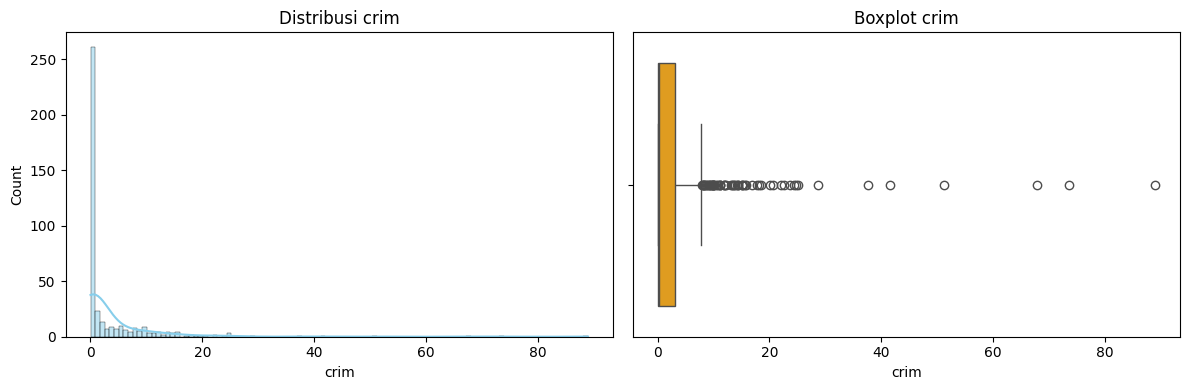

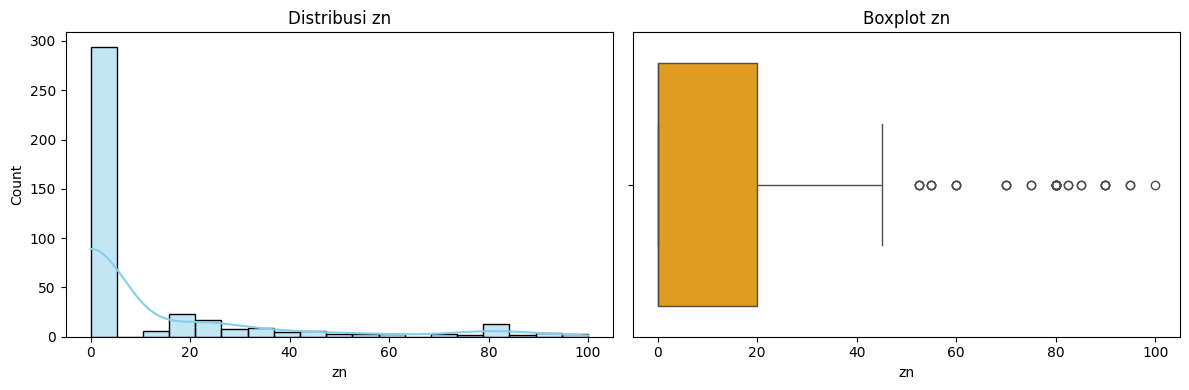

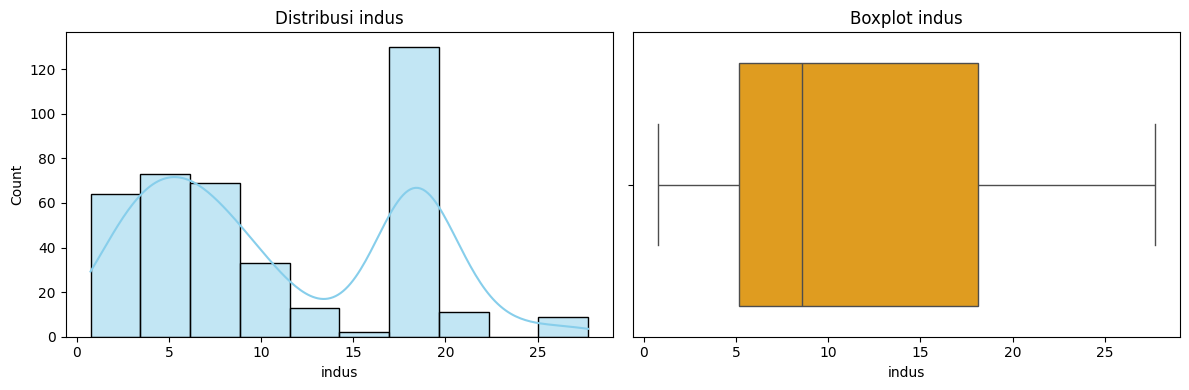

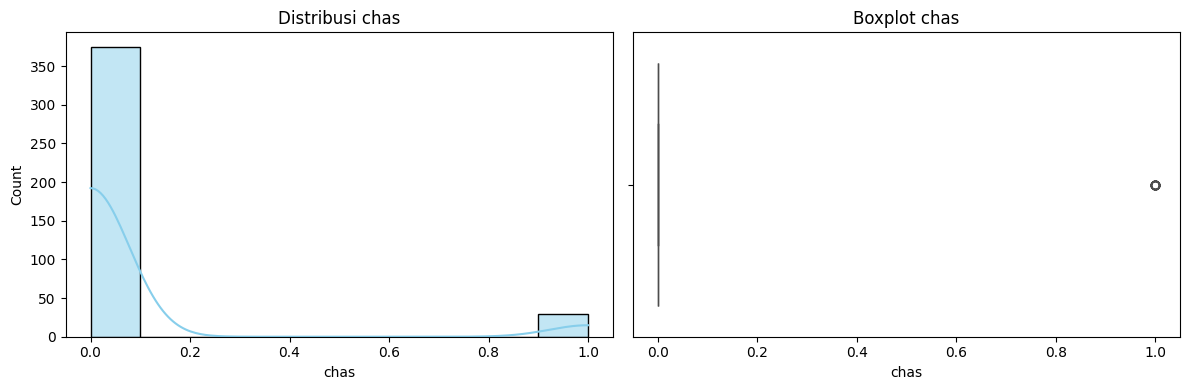

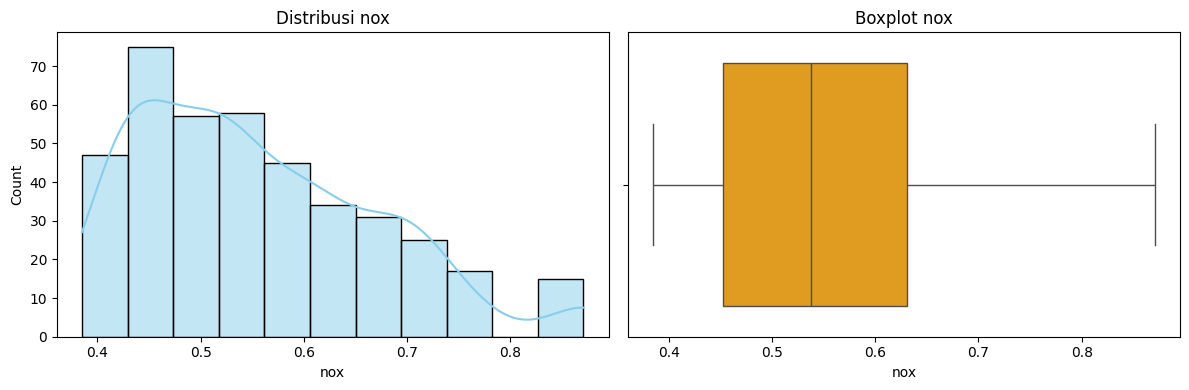

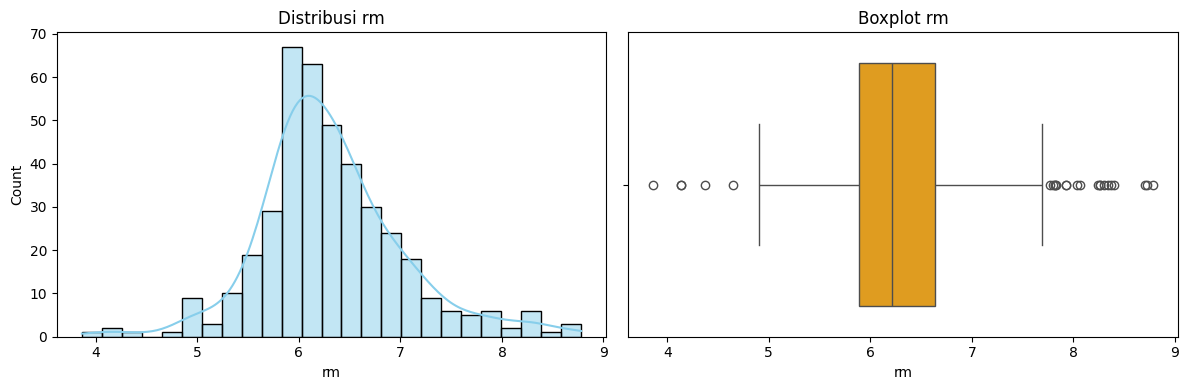

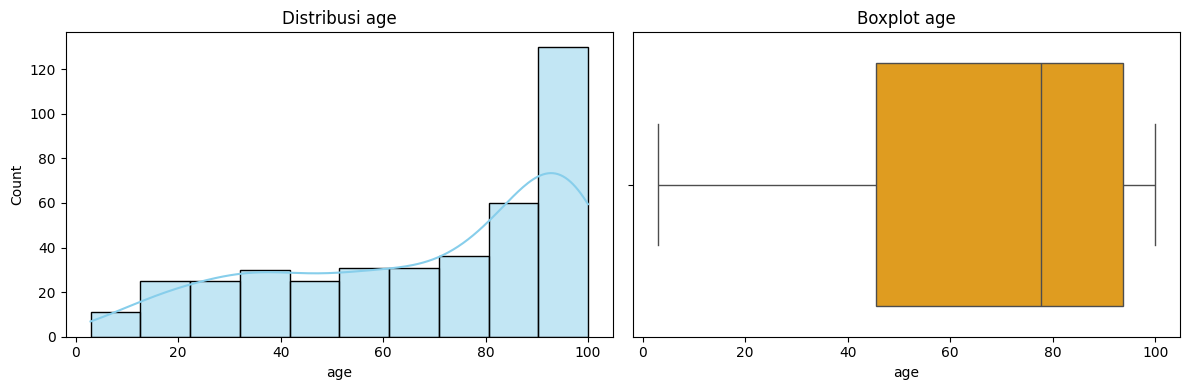

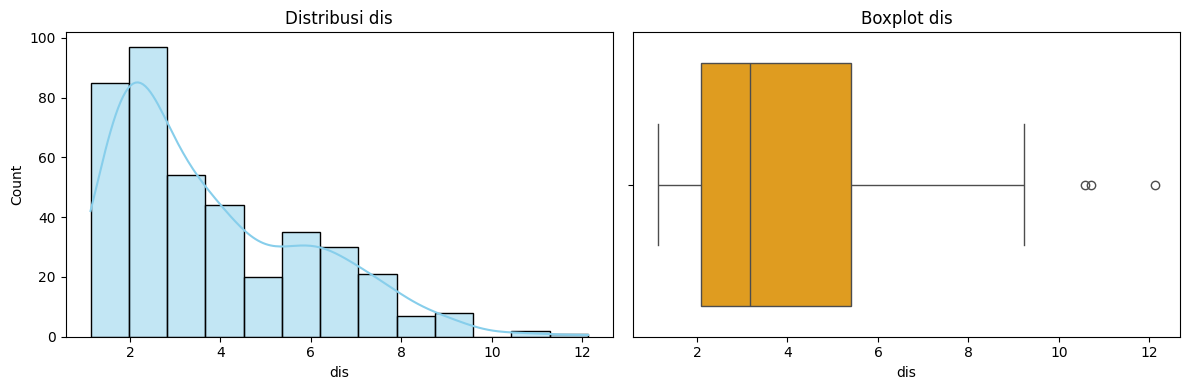

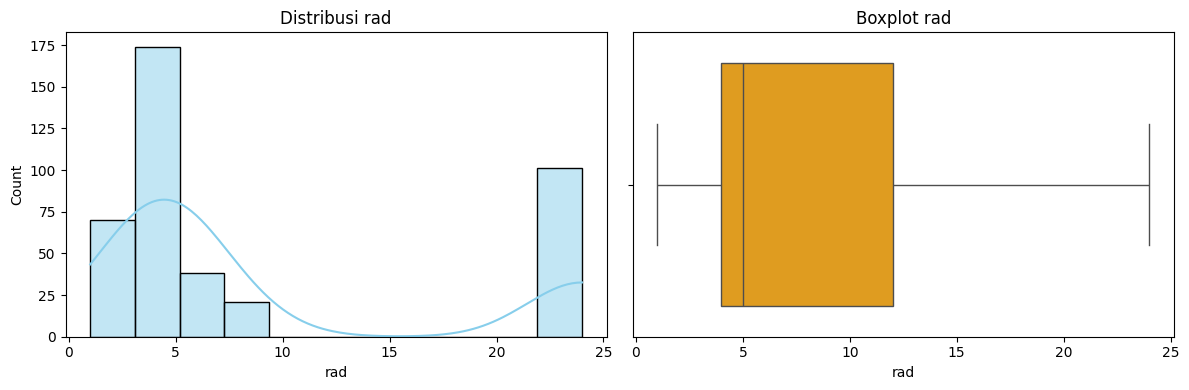

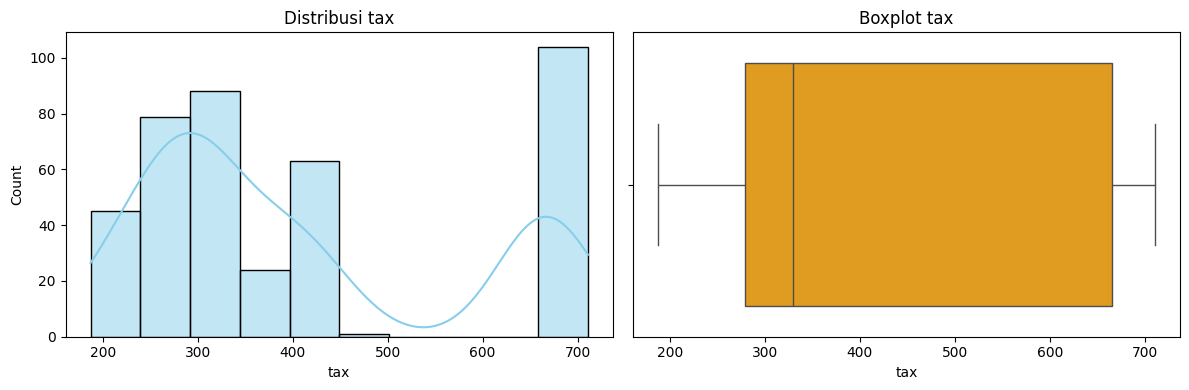

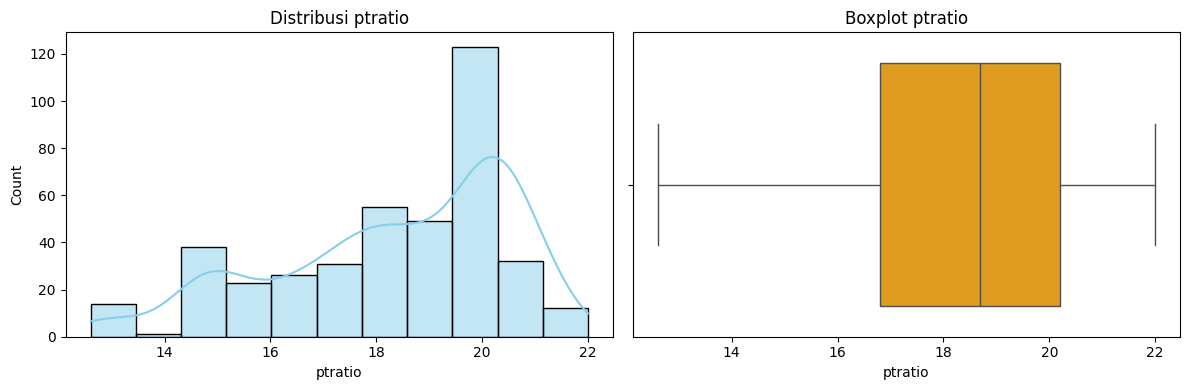

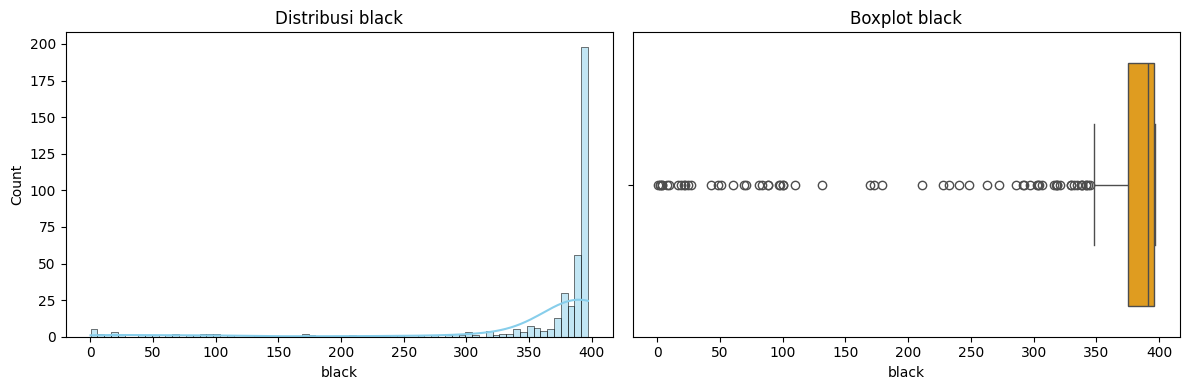

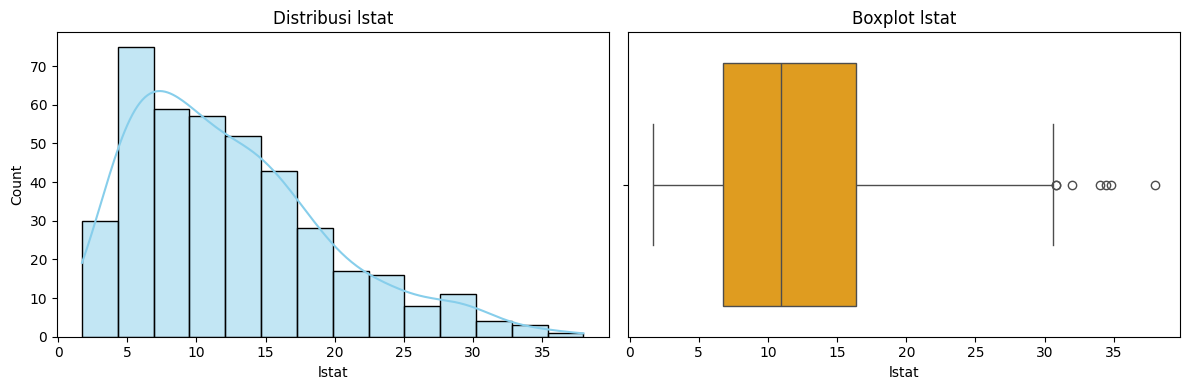

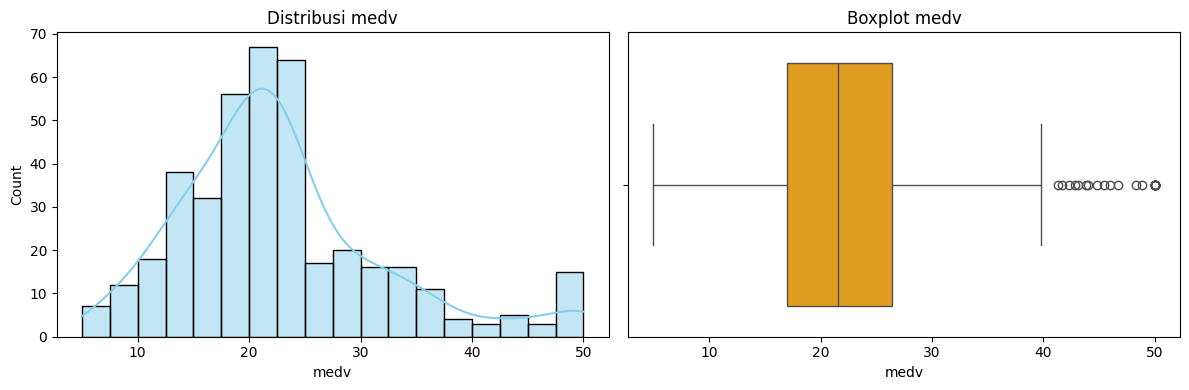

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_kolom = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

# Visualisasi grafik
def plot_distribution_outlier(data, kolom):

  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  # Plot distribusi
  sns.histplot(data[kolom], kde=True, ax=axes[0], color="skyblue")
  axes[0].set_title(f'Distribusi {kolom}')

  # Boxplot untuk outlier
  sns.boxplot(x=data[kolom], ax=axes[1], color="orange")
  axes[1].set_title(f'Boxplot {kolom}')

  plt.tight_layout()
  plt.show()

print("\n=== Visualisasi Sebelum Penanganan Outlier (Data Train) ===")
for kolom in kolom_kolom:
    plot_distribution_outlier(data_train, kolom)


Berdasarkan visulisasi Histogram dan Boxplot di atas, dapat dilihat bahwa adanya indikasi outlier pada data ini, tetapi dalam melakukan handling outlier tidak bisa sembarangan, terutama dalam pembuatan model, mengingat bahwasanya proses handling outlier ini bisa saja berdampak positif atau bahkan negatif untuk model yang akan dibuat, untuk itu akan dibuat dataframe baru yang merupakan hasil handling outlier. Metode Handling Outlier yang digunakan adalah IQR dan Z-score.

#### Dataframe Baru (df_noOutlier)

In [9]:
# Membuaat salinan DataFrame df, agar tidak mengganggu data asal (df)
df_noOutlier = data_train.copy()

#### Z-Score Method

In [10]:
from scipy import stats

kolom_analisis = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']

# menghitung Z-Score untuk setiap kolom
for kolom in kolom_analisis:
     df_noOutlier[f'Z_Score_{kolom}'] = stats.zscore(df_noOutlier[kolom])

In [11]:
df_noOutlier.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'Z_Score_crim', 'Z_Score_zn',
       'Z_Score_indus', 'Z_Score_chas', 'Z_Score_nox', 'Z_Score_rm',
       'Z_Score_age', 'Z_Score_dis', 'Z_Score_rad', 'Z_Score_tax',
       'Z_Score_ptratio', 'Z_Score_black', 'Z_Score_lstat', 'Z_Score_medv'],
      dtype='object')

In [12]:
# menghitung jumlah data yang bernilai di bawah -3 atau di atas 3
kolom_zscore = ['Z_Score_crim', 'Z_Score_zn',
       'Z_Score_indus', 'Z_Score_chas', 'Z_Score_nox', 'Z_Score_rm',
       'Z_Score_age', 'Z_Score_dis', 'Z_Score_rad', 'Z_Score_tax',
       'Z_Score_ptratio', 'Z_Score_black', 'Z_Score_lstat', 'Z_Score_medv']
for kolom in kolom_zscore:
    jumlah_outlier = ((df_noOutlier[kolom] < -3) | (df_noOutlier[kolom] > 3)).sum()
    print(f"Jumlah outlier pada {kolom}: {jumlah_outlier}")


Jumlah outlier pada Z_Score_crim: 6
Jumlah outlier pada Z_Score_zn: 11
Jumlah outlier pada Z_Score_indus: 0
Jumlah outlier pada Z_Score_chas: 29
Jumlah outlier pada Z_Score_nox: 0
Jumlah outlier pada Z_Score_rm: 6
Jumlah outlier pada Z_Score_age: 0
Jumlah outlier pada Z_Score_dis: 3
Jumlah outlier pada Z_Score_rad: 0
Jumlah outlier pada Z_Score_tax: 0
Jumlah outlier pada Z_Score_ptratio: 0
Jumlah outlier pada Z_Score_black: 20
Jumlah outlier pada Z_Score_lstat: 4
Jumlah outlier pada Z_Score_medv: 0


Output tersebut menunjukkan jumlah outlier pada setiap fitur dataset prediksi harga rumah di kota Boston menggunakan metode Z-Score. Fitur-fitur dengan jumlah outlier yang signifikan adalah:

1.  Z_Score_chas (29): Menunjukkan bahwa ada 29 data yang memiliki nilai ekstrem pada fitur "Is bounds with river", yang berarti ada beberapa rumah yang memiliki lokasi unik di dekat sungai.
2.  Z_Score_black (20): Menunjukkan bahwa ada 20 data yang memiliki nilai ekstrem pada fitur "Black proportion", yang berarti ada beberapa daerah dengan proporsi penduduk kulit hitam yang sangat tinggi atau rendah.
3.  Z_Score_zn (11): Menunjukkan bahwa ada 11 data yang memiliki nilai ekstrem pada fitur "Residential land zoned proportion", yang berarti ada beberapa daerah dengan proporsi lahan perumahan yang sangat tinggi atau rendah.

Fitur-fitur lainnya memiliki jumlah outlier yang relatif rendah atau tidak ada outlier sama sekali, menunjukkan bahwa nilai-nilai pada fitur-fitur tersebut relatif stabil dan tidak memiliki nilai ekstrem.

Hasil ini dapat digunakan untuk mempertimbangkan strategi penanganan outlier, seperti transformasi data atau penghapusan outlier, untuk meningkatkan kualitas data dan kinerja model prediksi harga rumah.

#### IQR Method

In [13]:
kolom_cek = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv',]

for kolom in kolom_cek:
    IQR = df_noOutlier[kolom].quantile(0.75) - df_noOutlier[kolom].quantile(0.25)
    lower_boundary = df_noOutlier[kolom].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df_noOutlier[kolom].quantile(0.75) + (IQR * 1.5)

    print(f"Kolom: {kolom}")
    print(f"Lower Boundary: {lower_boundary}")
    print(f"Upper Boundary: {upper_boundary}")
    print()

Kolom: crim
Lower Boundary: -4.60085
Upper Boundary: 7.88525

Kolom: zn
Lower Boundary: -30.0
Upper Boundary: 50.0

Kolom: indus
Lower Boundary: -14.325000000000006
Upper Boundary: 37.55500000000001

Kolom: chas
Lower Boundary: 0.0
Upper Boundary: 0.0

Kolom: nox
Lower Boundary: 0.18350000000000005
Upper Boundary: 0.8995

Kolom: rm
Lower Boundary: 4.7711250000000005
Upper Boundary: 7.756125

Kolom: age
Lower Boundary: -26.599999999999994
Upper Boundary: 165.79999999999998

Kolom: dis
Lower Boundary: -2.881512499999999
Upper Boundary: 10.370187499999998

Kolom: rad
Lower Boundary: -8.0
Upper Boundary: 24.0

Kolom: tax
Lower Boundary: -301.5
Upper Boundary: 1246.5

Kolom: ptratio
Lower Boundary: 11.700000000000003
Upper Boundary: 25.299999999999997

Kolom: black
Lower Boundary: 345.0487499999999
Upper Boundary: 426.17875000000004

Kolom: lstat
Lower Boundary: -7.627500000000002
Upper Boundary: 30.772500000000004

Kolom: medv
Lower Boundary: 2.7750000000000004
Upper Boundary: 40.574999999

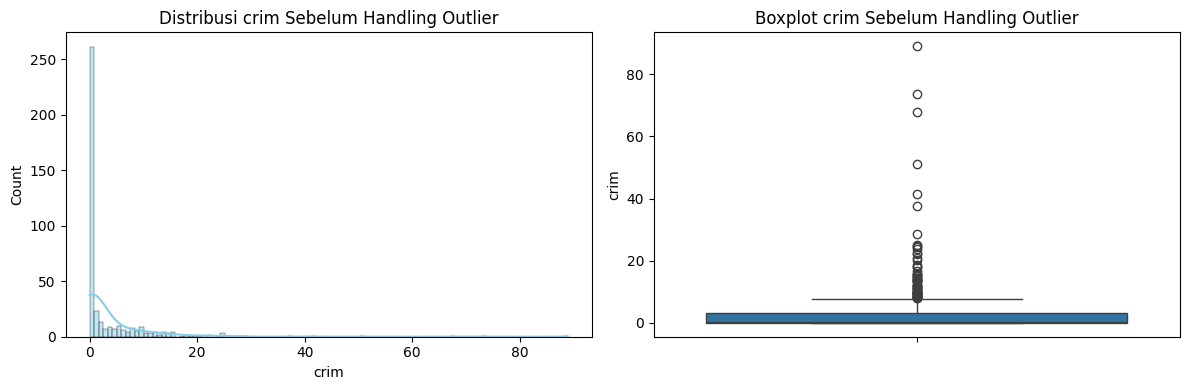

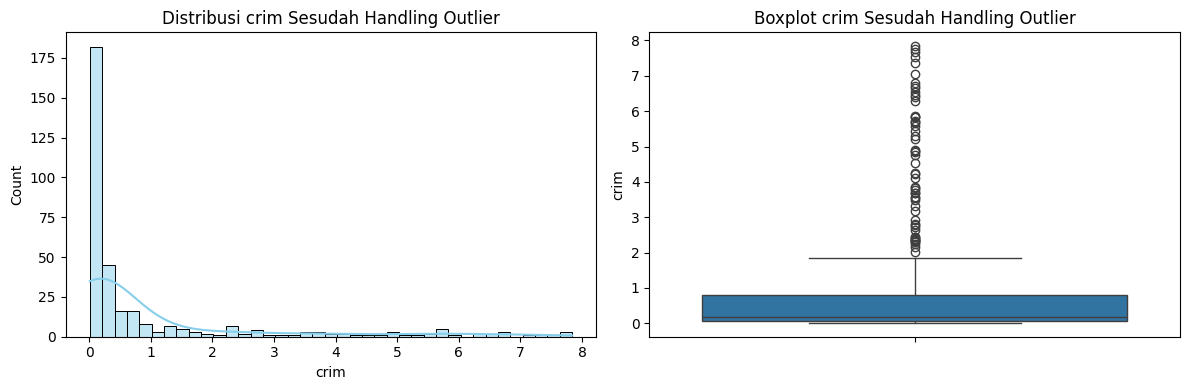

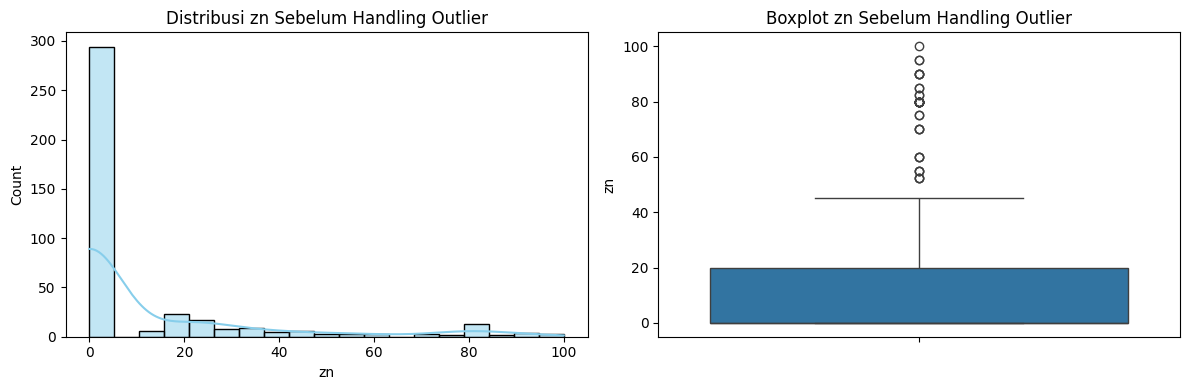

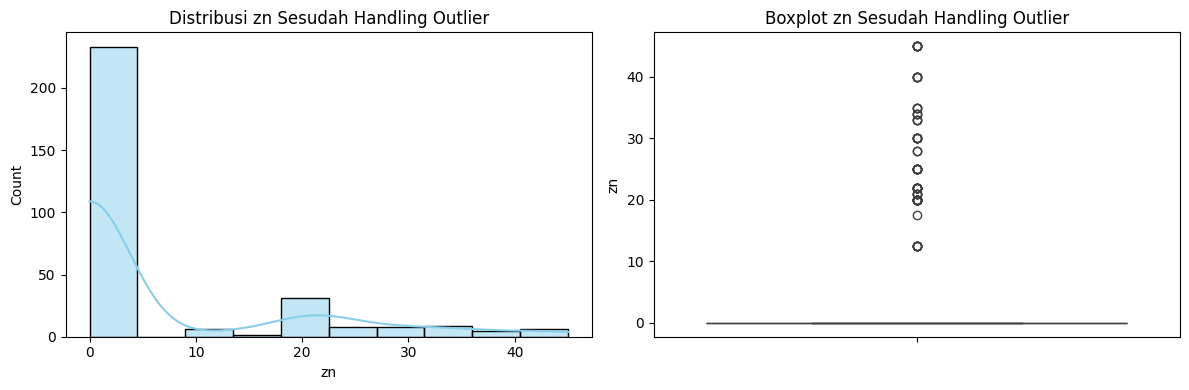

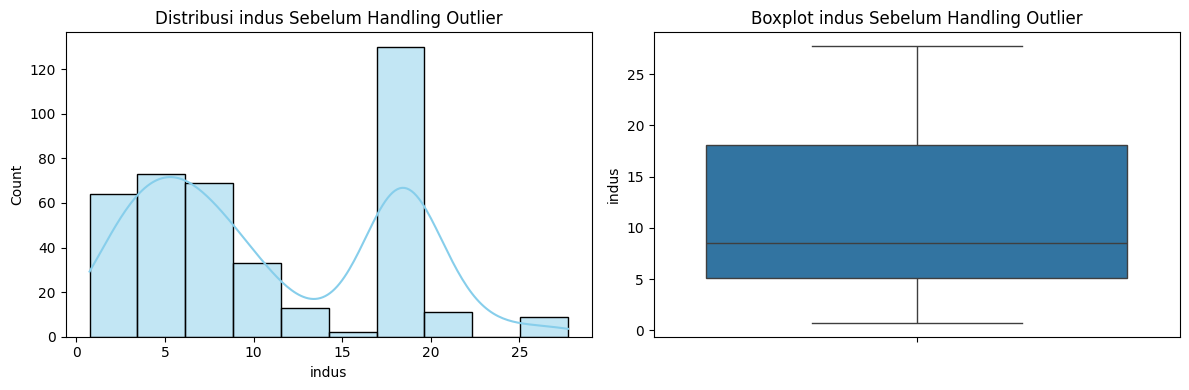

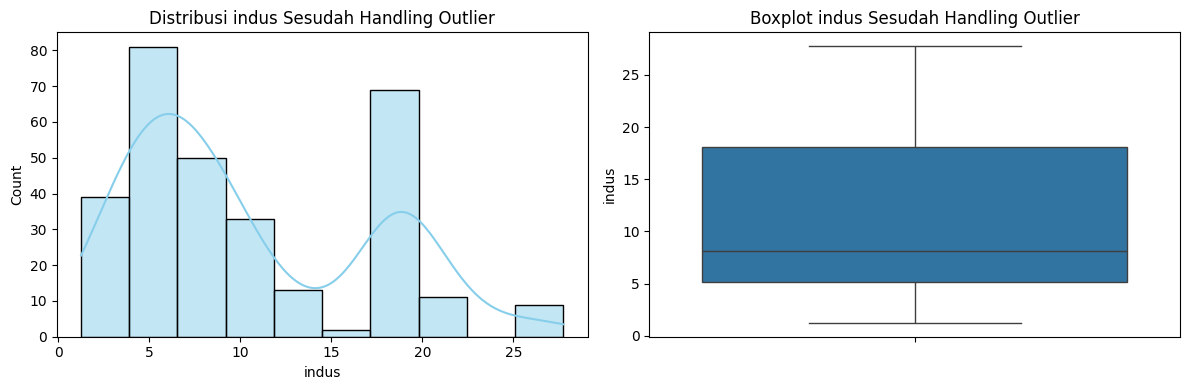

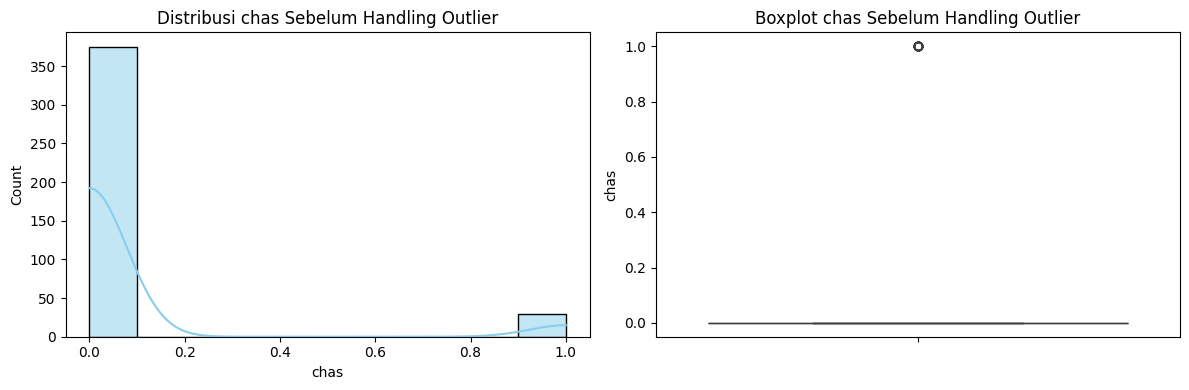

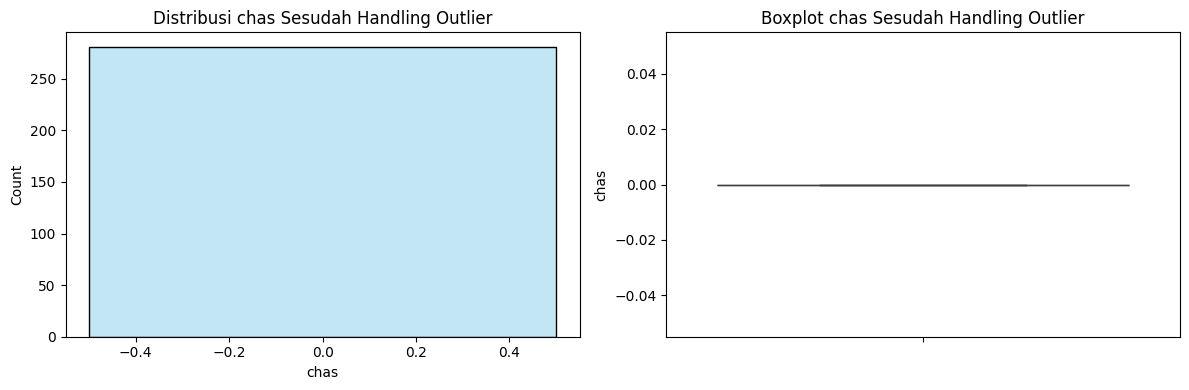

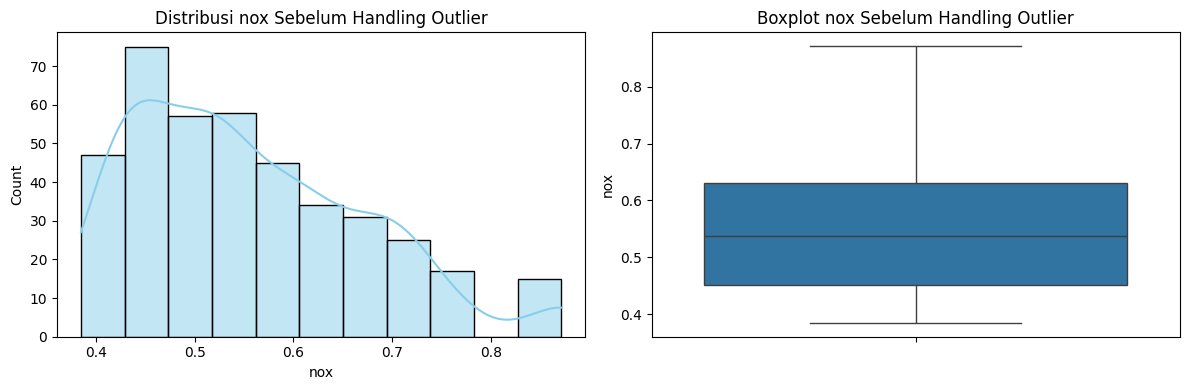

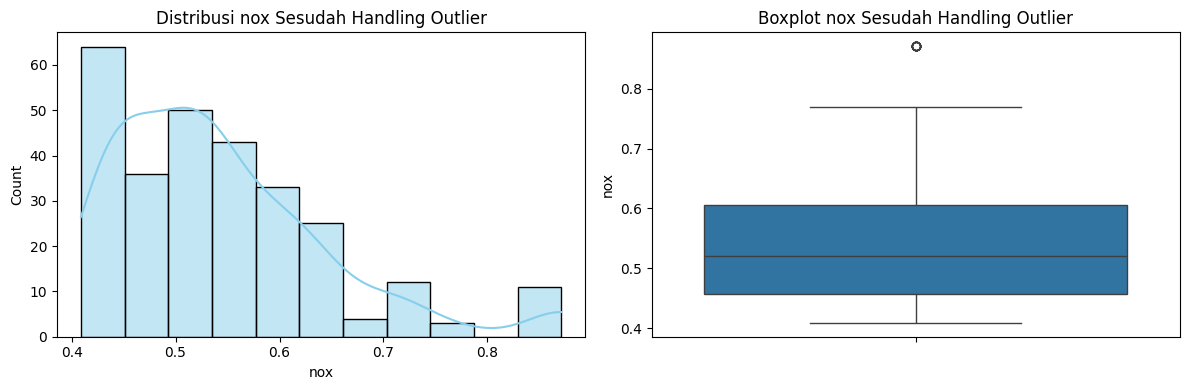

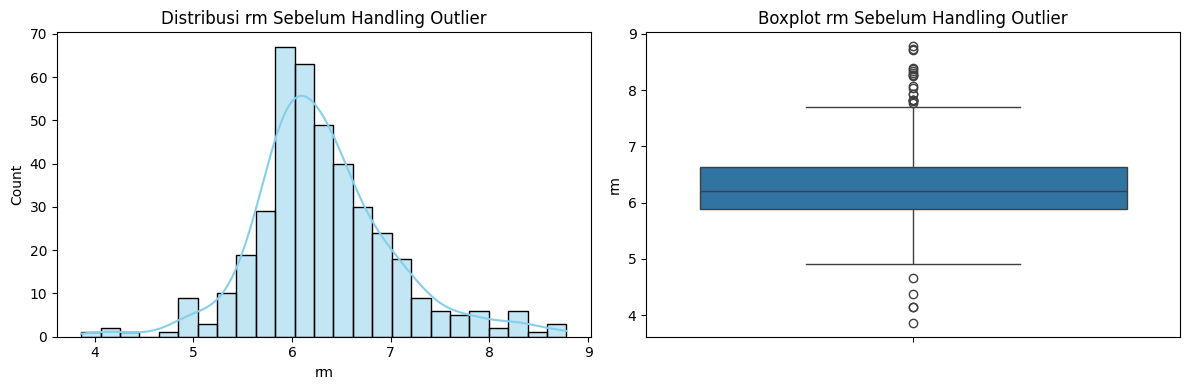

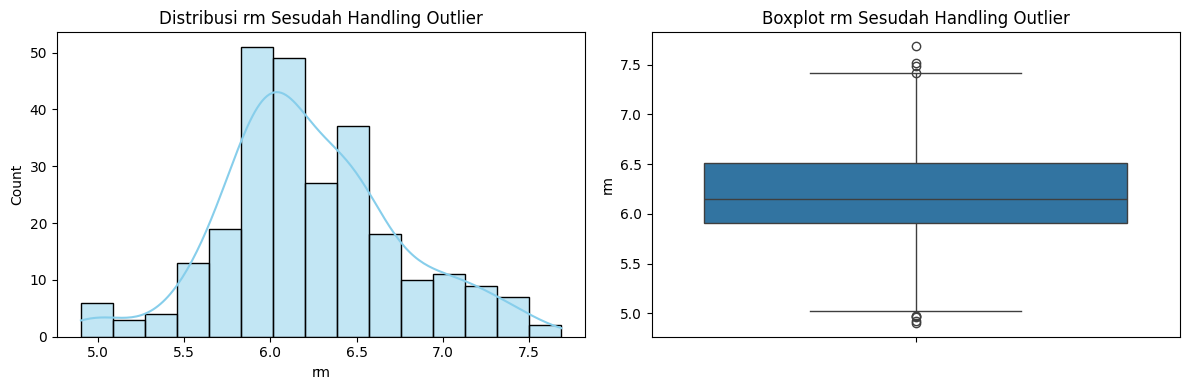

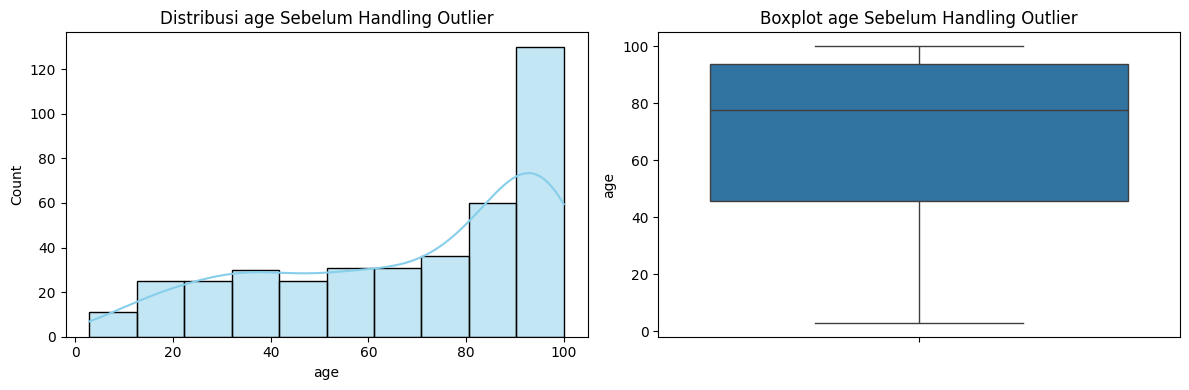

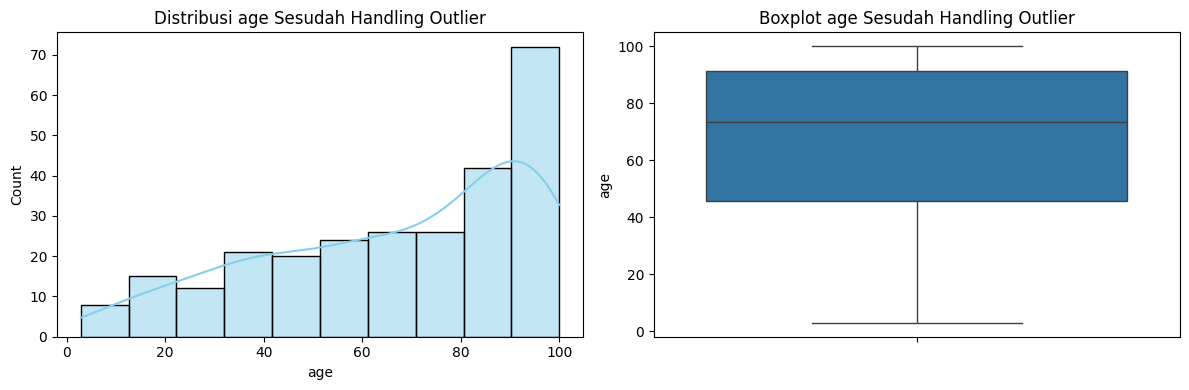

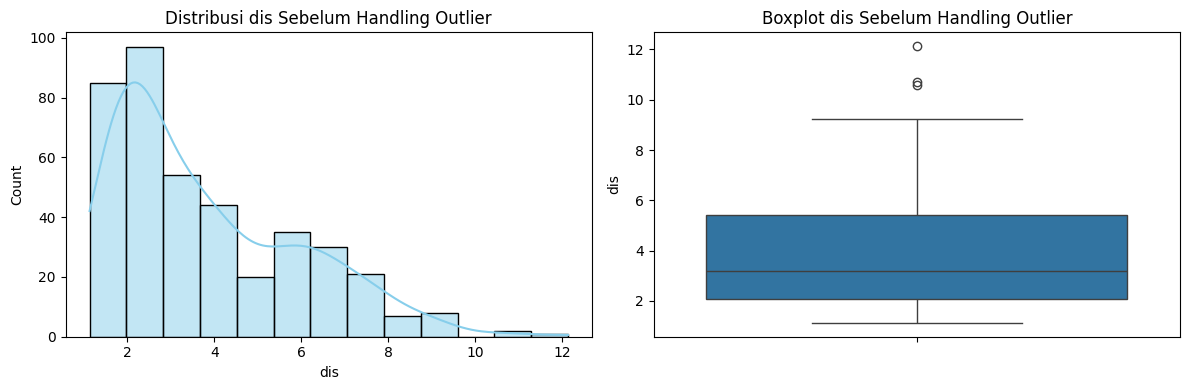

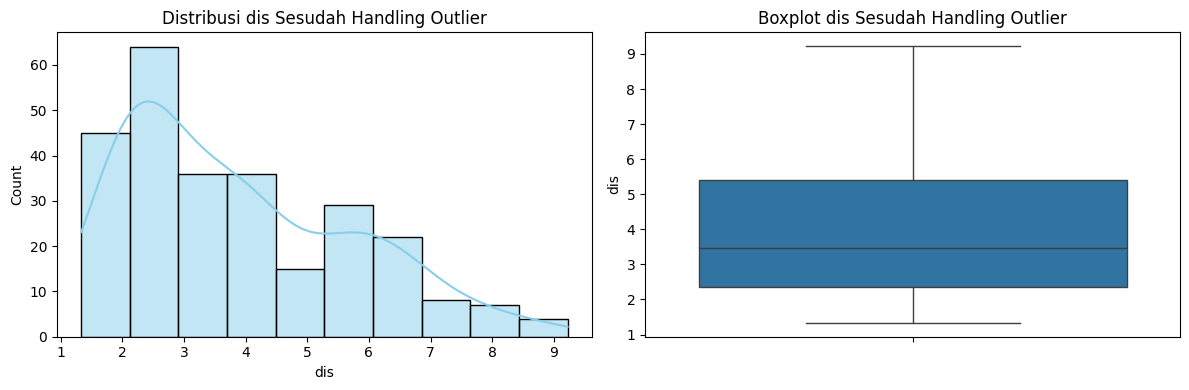

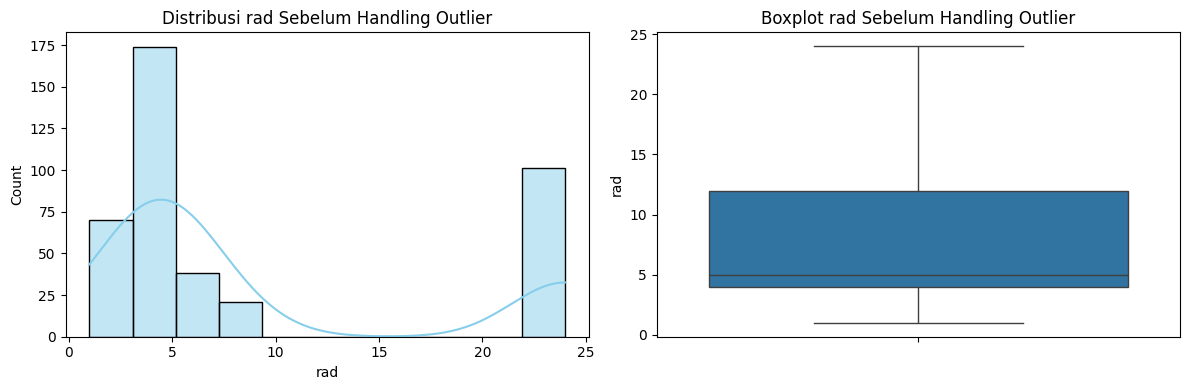

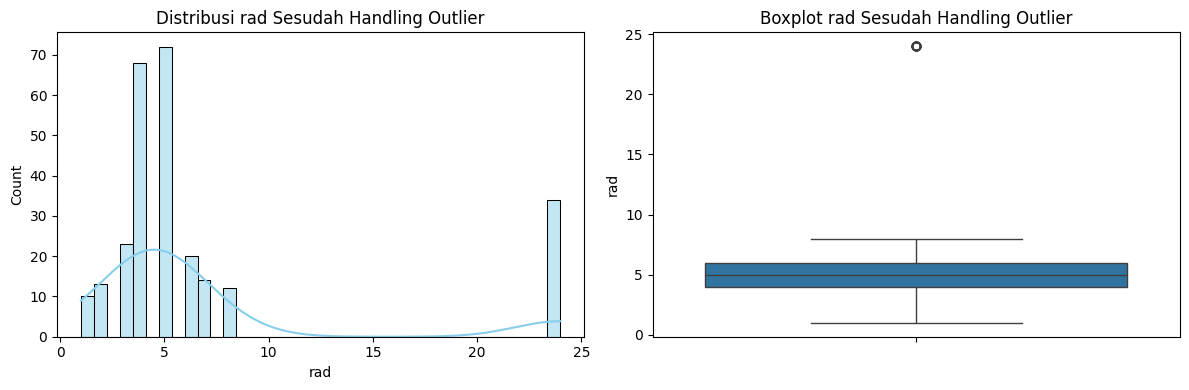

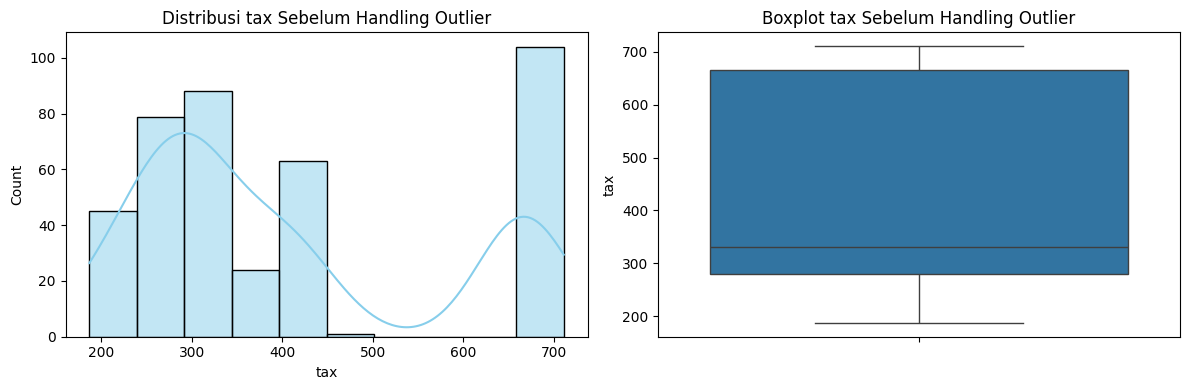

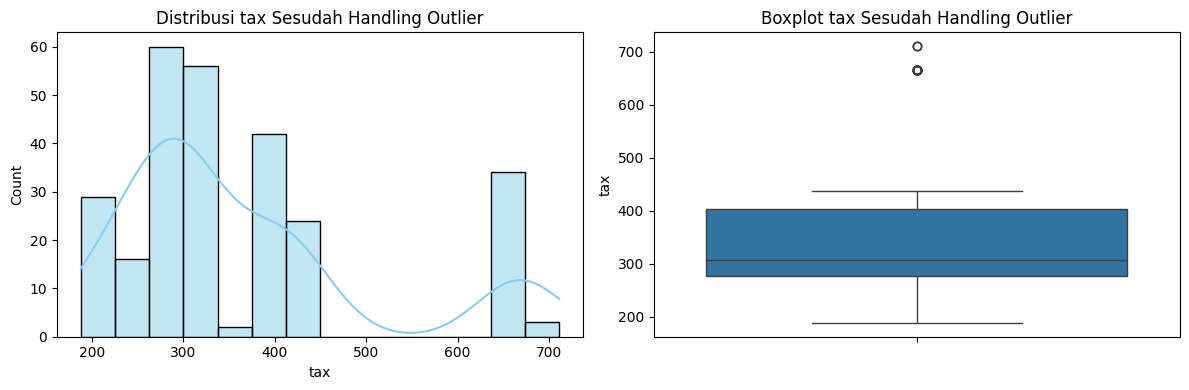

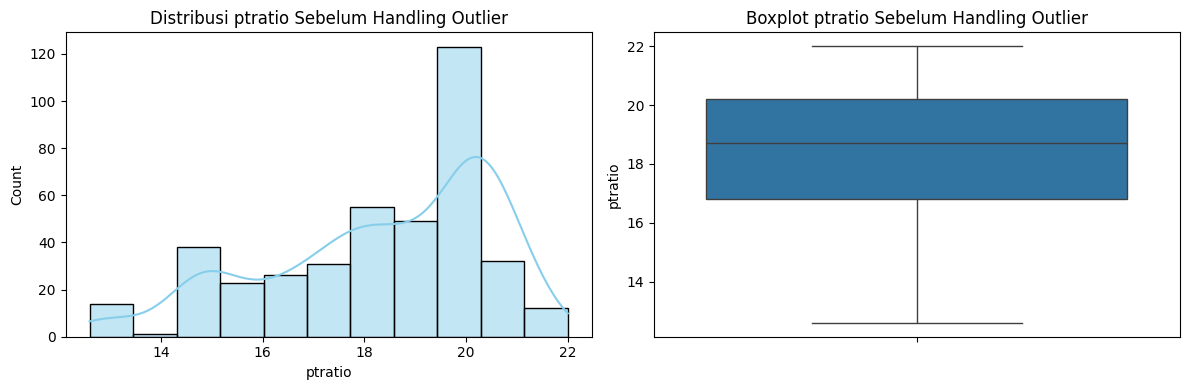

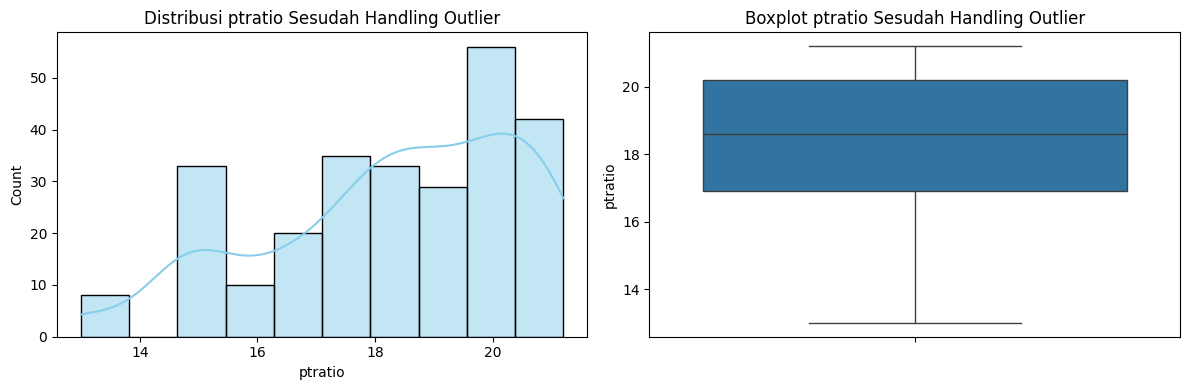

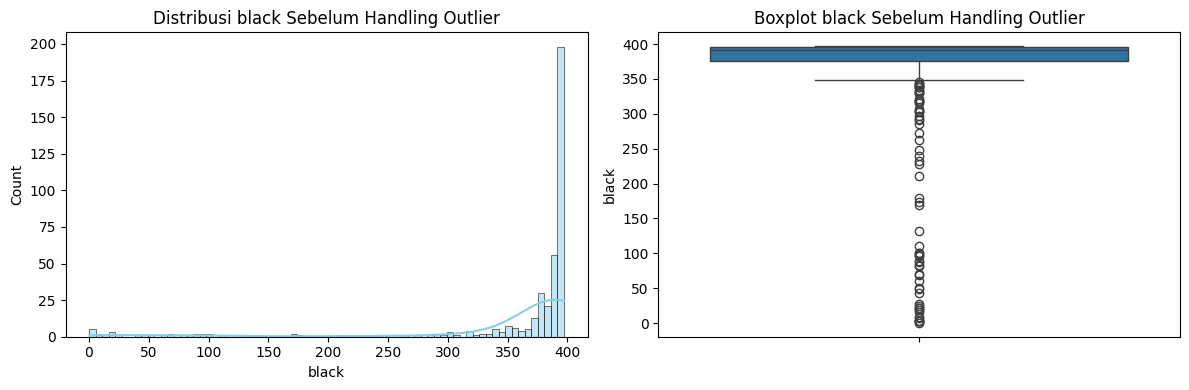

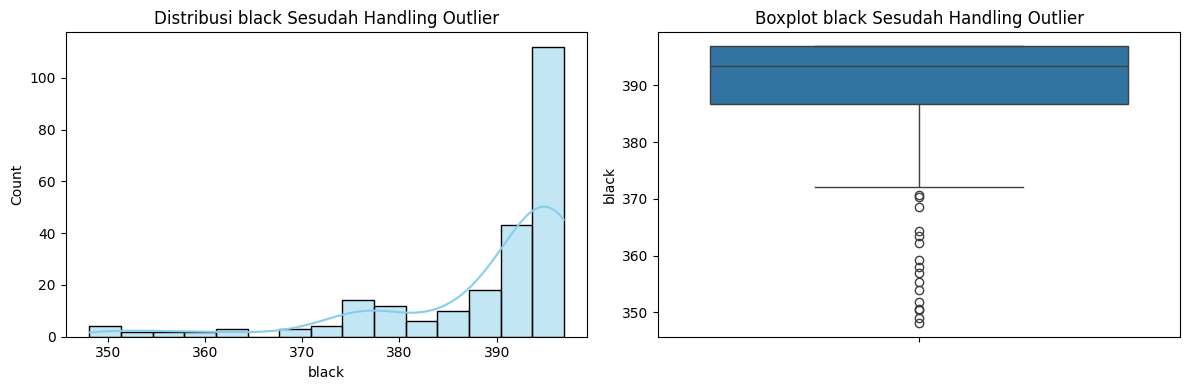

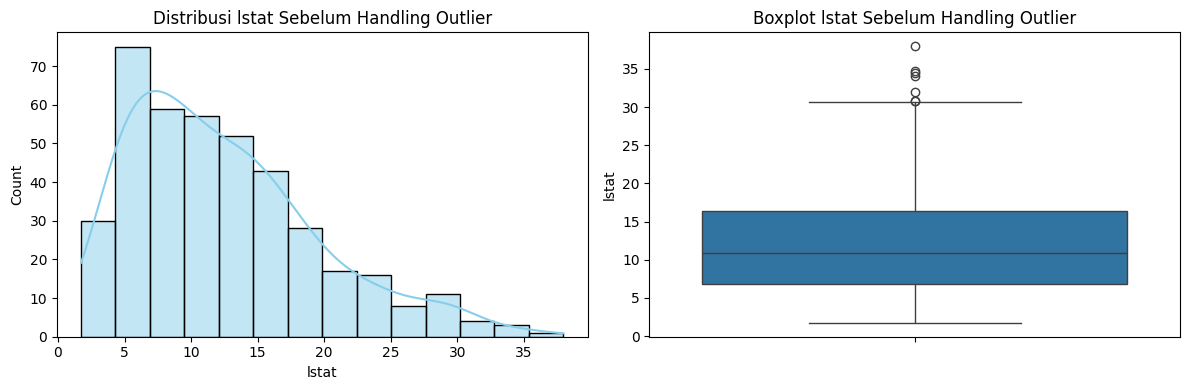

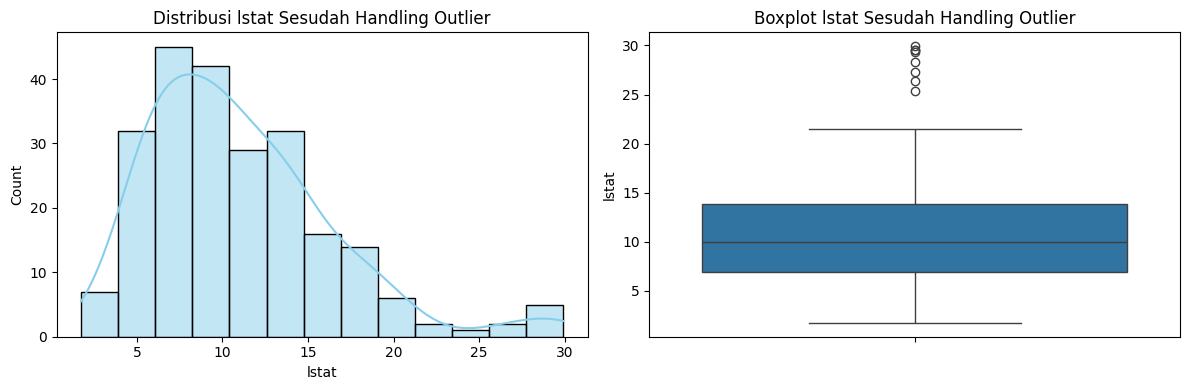

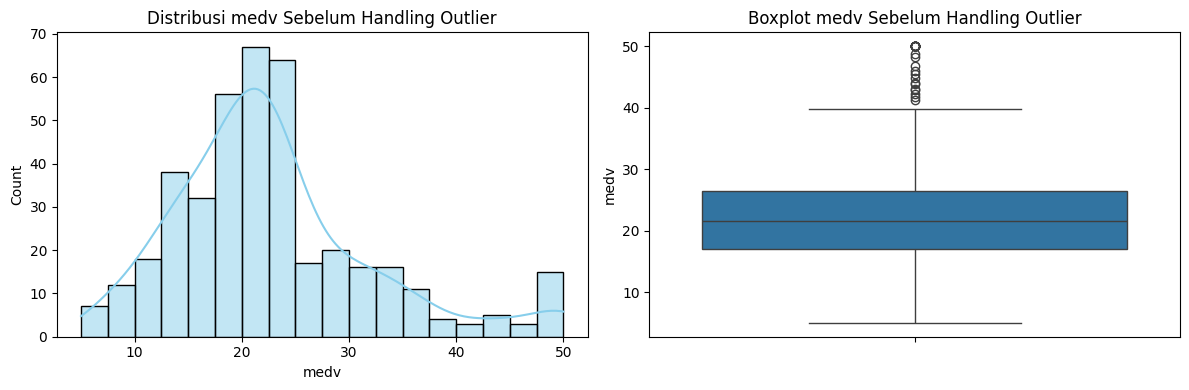

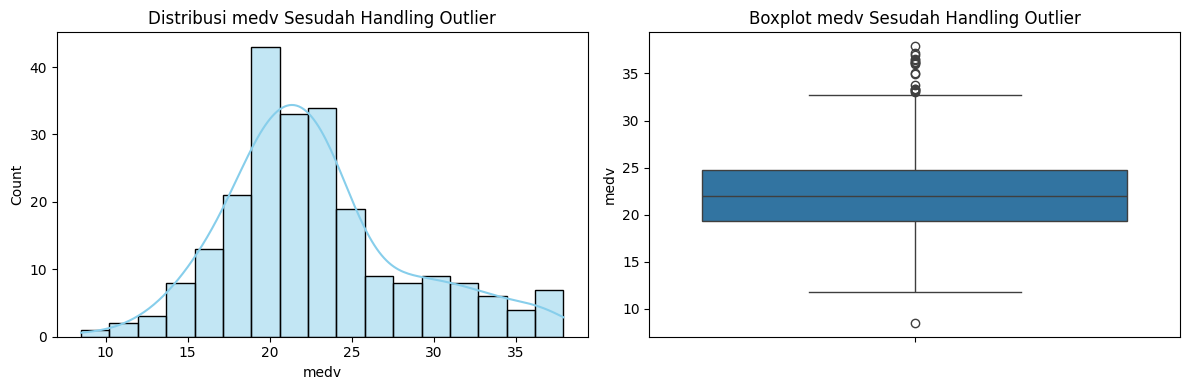

In [14]:
# Kolom yang akan dicek
kolom_cek = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

# Buat salinan df_noOutlier
df_noOutlier_afterHandling = df_noOutlier.copy()

# Iterasi
for kolom in kolom_cek:
    # Handling Outlier dengan IQR
    IQR = df_noOutlier[kolom].quantile(0.75) - df_noOutlier[kolom].quantile(0.25)
    lower_boundary = df_noOutlier[kolom].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df_noOutlier[kolom].quantile(0.75) + (IQR * 1.5)

    # Data setelah Handling Outlier
    df_noOutlier_afterHandling = df_noOutlier_afterHandling[(df_noOutlier_afterHandling[kolom] <= upper_boundary) & (df_noOutlier_afterHandling[kolom] >= lower_boundary)]

    # Visualisasi data sebelum Handling
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_noOutlier[kolom], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribusi {kolom} Sebelum Handling Outlier')
    sns.boxplot(data=df_noOutlier, y=kolom, ax=axes[1])
    axes[1].set_title(f"Boxplot {kolom} Sebelum Handling Outlier")
    plt.tight_layout()
    plt.show()

    # Visualisasi Data setelah Handling
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df_noOutlier_afterHandling[kolom], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Distribusi {kolom} Sesudah Handling Outlier')
    sns.boxplot(data=df_noOutlier_afterHandling, y=kolom, ax=axes[1])
    axes[1].set_title(f"Boxplot {kolom} Sesudah Handling Outlier")
    plt.tight_layout()
    plt.show()

Berdasarkan proses Handling Outlier menggunakan metode IQR di atas, dapat dilihat bahwasanya nilai Outlier sudah berkurang tetapi ini sangat berpengaruh pada model yang akan di-Developed, Sehingga ini tidak efektif untuk dilakukan Handling Outlier. Untuk itu data yang digunakan adalah tetap data awal sebelum handling outlier.

## Exploratory Data Analysis

In [15]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    int64  
 9   tax      404 non-null    int64  
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [16]:
data_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Output dari data_train.describe() menunjukkan statistik deskriptif dari dataset prediksi harga rumah di kota Boston. Dataset ini memiliki 404 sampel dan 14 fitur. Berikut adalah beberapa poin penting dari output tersebut:

1. Fitur crim memiliki rata-rata 3,61 dan standar deviasi 8,88, menunjukkan bahwa tingkat kejahatan di kota Boston memiliki variasi yang cukup besar.
2. Fitur zn memiliki rata-rata 11,57 dan standar deviasi 23,15, menunjukkan bahwa proporsi lahan perumahan di kota Boston memiliki variasi yang cukup besar.
3. Fitur medv memiliki rata-rata 22,80 dan standar deviasi 9,33, menunjukkan bahwa harga rumah di kota Boston memiliki variasi yang cukup besar, dengan harga minimum 5,0 dan maksimum 50,0.
4. Fitur chas memiliki rata-rata 0,07 dan standar deviasi 0,26, menunjukkan bahwa hanya sebagian kecil rumah di kota Boston yang berada di dekat sungai.
5. Fitur rm memiliki rata-rata 6,32 dan standar deviasi 0,71, menunjukkan bahwa jumlah kamar rata-rata di rumah-rumah di kota Boston adalah sekitar 6-7 kamar.

Secara keseluruhan, output tersebut menunjukkan bahwa dataset prediksi harga rumah di kota Boston memiliki variasi yang cukup besar dalam beberapa fitur, dan beberapa fitur memiliki distribusi yang tidak normal.

### Menghitung VIF Score

In [17]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


Output VIF score menunjukkan bahwa beberapa fitur memiliki multikolinearitas moderat hingga tinggi. Fitur rad (7,66) dan tax (8,94) memiliki VIF score di atas 5, menunjukkan multikolinearitas tinggi. Fitur nox (4,47), dis (4,17), dan indus (3,88) memiliki VIF score antara 3-5, menunjukkan multikolinearitas moderat. Fitur lainnya memiliki VIF score di bawah 3, menunjukkan multikolinearitas rendah. Hasil ini menunjukkan bahwa beberapa fitur mungkin memiliki korelasi kuat, perlu penanganan lebih lanjut untuk menghindari masalah multikolinearitas dalam model regresi.

### Heatmap Correlation

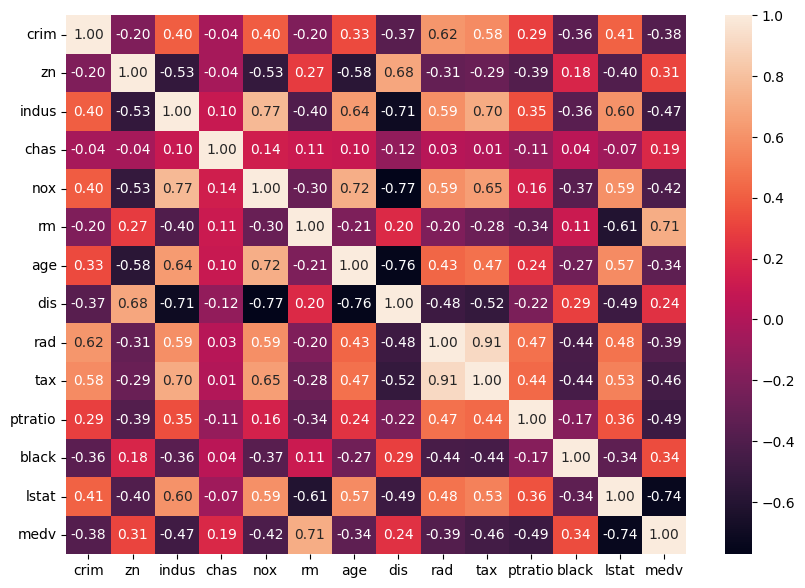

In [18]:
# heatmap correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Interpretasi & Insight dari Heatmap Korelasi**

Heatmap menunjukkan pola hubungan yang kuat antara beberapa variabel lingkungan, demografi, dan karakteristik properti terhadap harga rumah (medv). Di antara seluruh fitur, rm (jumlah rata-rata kamar) memiliki korelasi positif tertinggi dengan harga rumah (≈ +0.70). Ini menegaskan bahwa rumah dengan jumlah kamar lebih banyak cenderung memiliki harga yang lebih tinggi, sehingga fitur ini sangat penting dalam model regresi.

Sebaliknya, variabel lstat (persentase status ekonomi rendah) memiliki korelasi negatif yang sangat kuat (≈ -0.74) terhadap harga rumah. Artinya, semakin tinggi proporsi penduduk berstatus sosial rendah di suatu area, semakin rendah pula harga rumahnya. Variabel ini akan menjadi prediktor kunci dalam memahami area dengan penurunan nilai properti.

Fitur nox (konsentrasi polusi nitrogen oksida) juga menunjukkan korelasi negatif signifikan (≈ -0.42) dengan medv. Ini mencerminkan bahwa kualitas udara yang buruk berkontribusi pada nilai properti yang lebih rendah. Selain itu, dis (jarak ke pusat kota) memperlihatkan korelasi positif sedang (≈ +0.25), menandakan bahwa rumah di lokasi lebih jauh dari pusat kota cenderung memiliki harga sedikit lebih tinggi, kemungkinan akibat lingkungan yang lebih tenang dan suburban.

Beberapa fitur juga menunjukkan multikolinearitas kuat, seperti

1. rad dan tax (korelasi ≈ +0.91)

2. nox dan indus (≈ +0.77)

3. dis dengan nox, indus, atau age (korelasi negatif tinggi ≈ –0.7)

Multikolinearitas ini perlu diperhatikan dalam pemilihan fitur dan regularisasi model, karena dapat mempengaruhi stabilitas dan interpretasi koefisien regresi.

Secara keseluruhan, heatmap menunjukkan bahwa harga rumah Boston sangat dipengaruhi oleh kualitas lingkungan, status ekonomi penduduk, dan karakteristik fisik rumah. Fitur seperti rm, lstat, dis, dan nox sangat relevan untuk model prediksi, sedangkan fitur yang sangat berkorelasi satu sama lain perlu ditangani dengan pendekatan seperti Ridge, Lasso, atau PCA.

### Seleksi Feature

Terdapat banyak pertimbangan dalam tahap ini. Dimana terdapat fitur-fitur yang redundant/perlu dipertimbangkan untuk di hapus, seperti:

1. rad dan tax (Korelasi +0.91 → sangat tinggi).
Kedua fitur ini memiliki korelasi sangat kuat, hampir duplikasi informasi. Dalam regresi linear, multikolinearitas setinggi ini bisa membuat koefisien tidak stabil.


2. indus dan nox (Korelasi +0.77 → tinggi).
Area industri cenderung meningkatkan polusi NOx, sehingga informasinya tumpang tindih.

3. age dan dis (Korelasi –0.76 → tinggi).
Daerah yang lebih dekat kota memiliki rumah lebih tua, sehingga age dan dis memberi sinyal sosial-ekonomi yang mirip.

4. lstat dan rm berlawanan arah tetapi kuat (–0.74 dan +0.70 dengan medv).
Bukan redundant satu sama lain, tetapi keduanya sudah sangat informatif, sehingga beberapa fitur lain yang lebih lemah mungkin tidak dibutuhkan.


Terdapat juga fitur yang kurang relevan / bisa dipertimbangkan untuk drop

1. chas (apakah dekat sungai) — Korelasi sangat kecil (+0.11). Fitur biner ini tidak punya pengaruh kuat terhadap harga rumah. Dalam banyak eksperimen, chas sering tidak signifikan dan bisa di-drop tanpa mengurangi performa model.

**Kesimpulan Seleksi Fitur**

1. Kandidat Drop (Paling Lemah)
* chas → korelasi rendah, dampak kecil.

2. Kandidat Redundant (hati-hati jika tetap dipakai)
* rad vs tax → pilih salah satu.
* indus vs nox → pilih salah satu jika ingin model simpel.
* age vs dis → terlalu berkorelasi.

3. Tidak di-drop (sangat penting untuk prediksi)
* rm (fitur paling kuat positif)
* lstat (fitur paling kuat negatif)

Untuk mengetahui lebih dalam apakah fitur redundan ini mempengaruhi model, maka akan dibuat lebih dari satu data train dengan berbagai skenario. Sehingga mengetahui mana model yang lebih baik.

In [19]:
# drop weak correlation features

#variable baru 'feature_df_nochas_train' digunakan untuk mempertahankan data awal
feature_df_nochas_train = feature_df_train.drop(columns='chas')
feature_df_nochas_test = feature_df_test.drop(columns='chas')

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_nochas_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.706911
2,zn,2.461731
3,indus,3.836817
4,nox,4.439601
5,rm,1.943980
6,age,2.987619
7,dis,4.166304
8,rad,7.574497
9,tax,8.846292
10,ptratio,1.842480


## Model Training

### Ridge Regression

In [22]:
from sklearn.linear_model import LinearRegression, Ridge

# train the model
X_df_train = feature_df_nochas_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)


simple_reg = LinearRegression().fit(X_df_train, y_df_train)
simple_reg

LinearRegression()

In [ ]:
# from sklearn.linear_model import Ridge
# math -> lambda
# code -> alpha

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()
y_admit_train = y_admit_train.reshape(len(y_admit_train),)

# define the model
ridge_reg = Ridge(alpha=0.1,
                  random_state=42)

ridge_reg.fit(X_admit_train, y_admit_train)